# White wine quality

Life is too short to drink bad wine. 

Which features are the most indicative of a good quality wine?

# Table of contents
1. Data overview
2. Data preparation
3. Feature selection techniques <br>
    3.1. Scatterplot matrix <br>
    3.2. Pearson correlation matrix with heatmap <br>
    3.3. Feature importance <br>
    3.4. Univariate selection <br>
    3.5. Random Forest <br>
4. Feature extraction techniques for dimensionality reduction <br>
    4.1. Principal Component Analysis (PCA) <br>
    4.2. Linear Discriminant Analysis (LDA)

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## 1. Data overview

In [2]:
# read csv file
df = pd.read_csv('winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<b> Input variables (based on physicochemical tests): </b>

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

<b> Output variable (based on sensory data): </b>

12 - quality (score between 0 and 10)

In [3]:
# data description
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
# missing values check
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

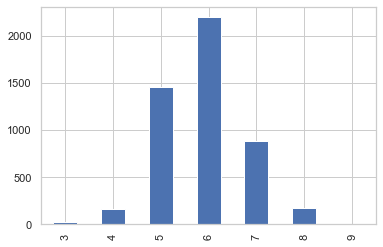

In [5]:
# quality distribution
df['quality'].value_counts().sort_index(ascending=True).plot(kind = 'bar');

In [6]:
df['quality'].value_counts().sort_index(ascending=True)

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

## 2. Data preparation

In [7]:
# split into training data and test data
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [8]:
# standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

In [9]:
df.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

## 3. Feature selection techniques

### 3.1. Scatterplot matrix

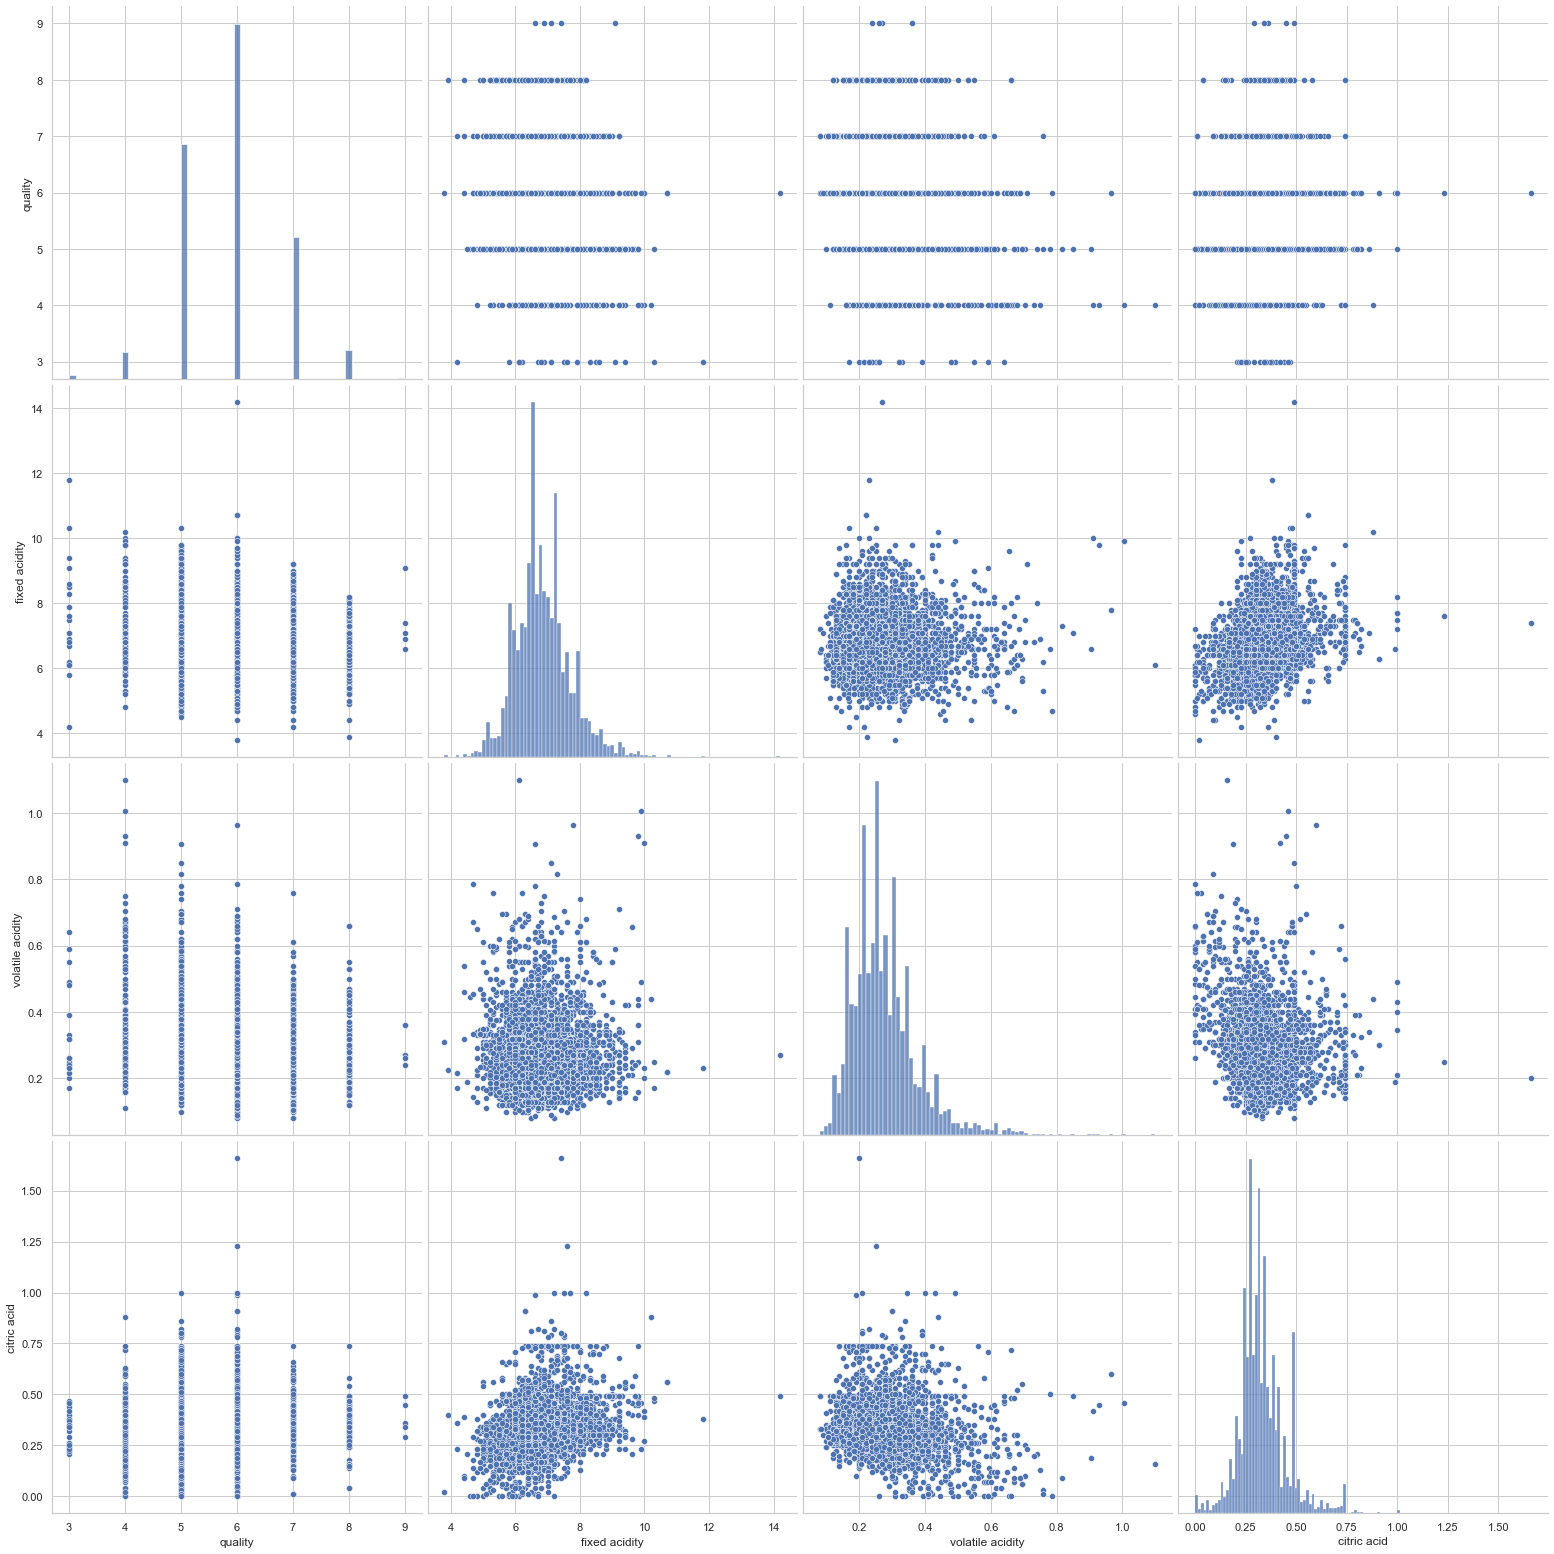

In [10]:
# non-linearity in output charts
cols=['quality','fixed acidity', 'volatile acidity','citric acid']
sns.pairplot(df[cols], height=5.5);

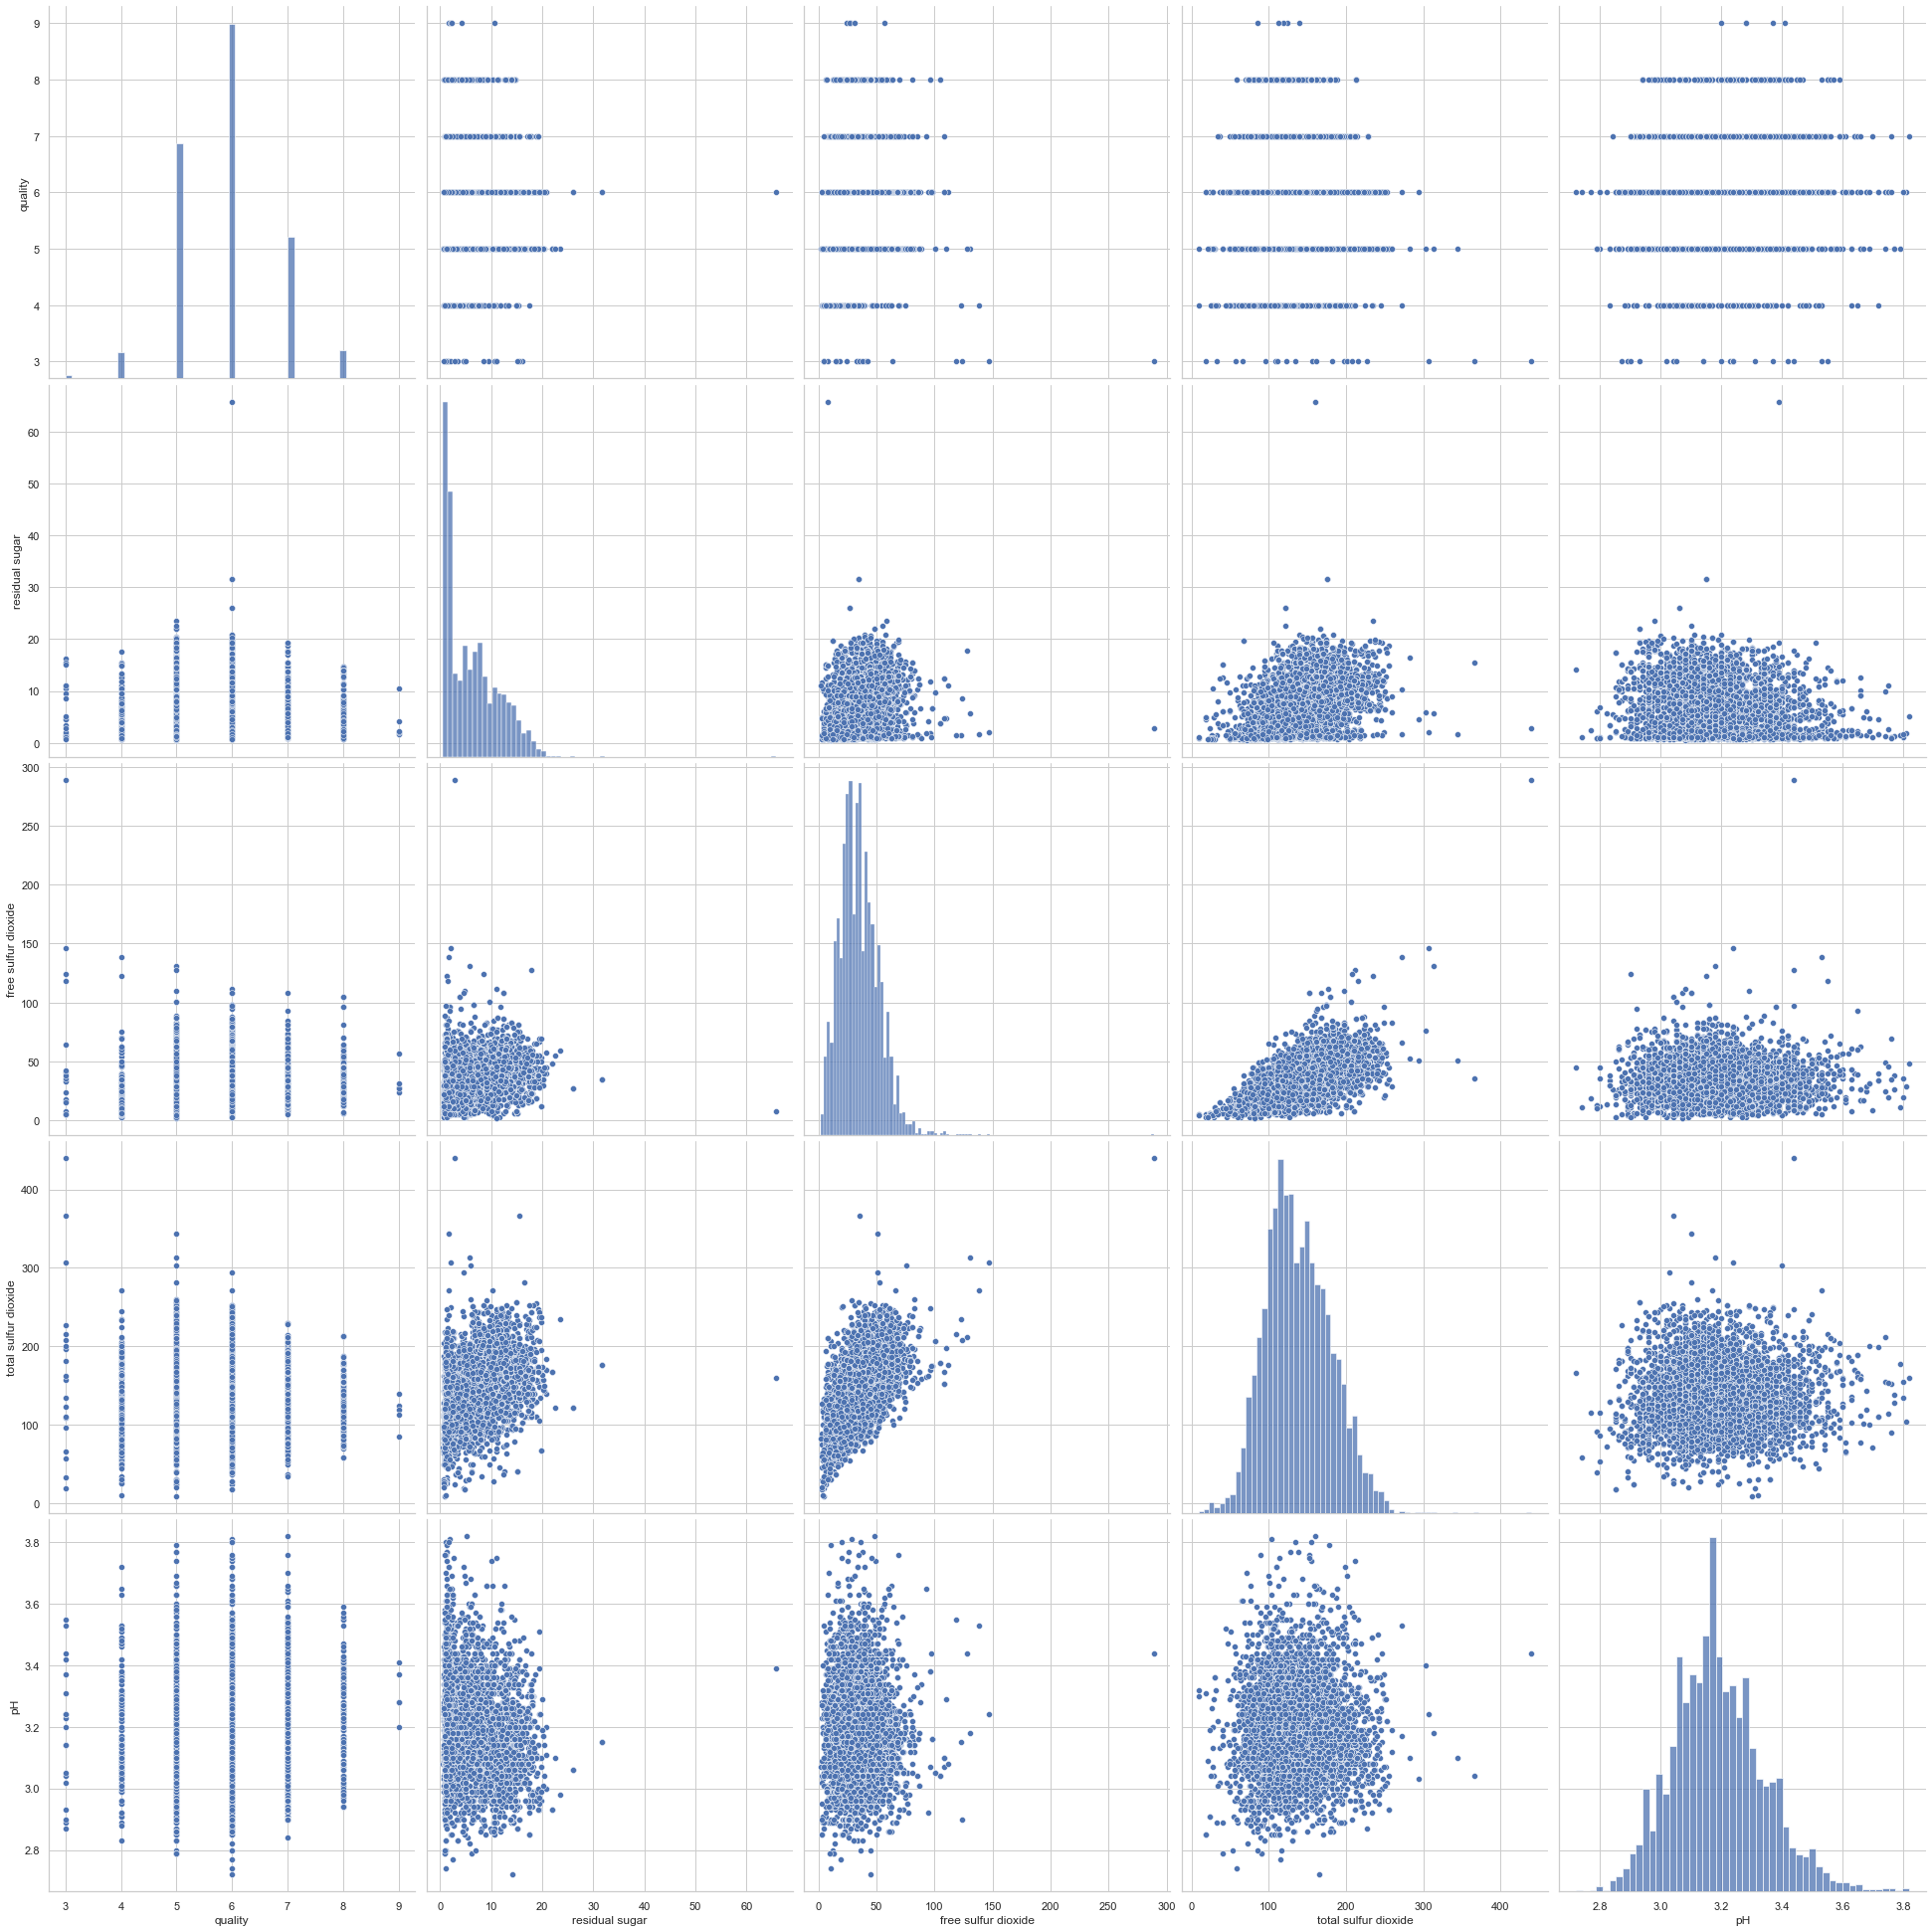

In [11]:
cols=['quality','residual sugar', 'free sulfur dioxide','total sulfur dioxide' ,'pH']
sns.pairplot(df[cols], height=5.5);

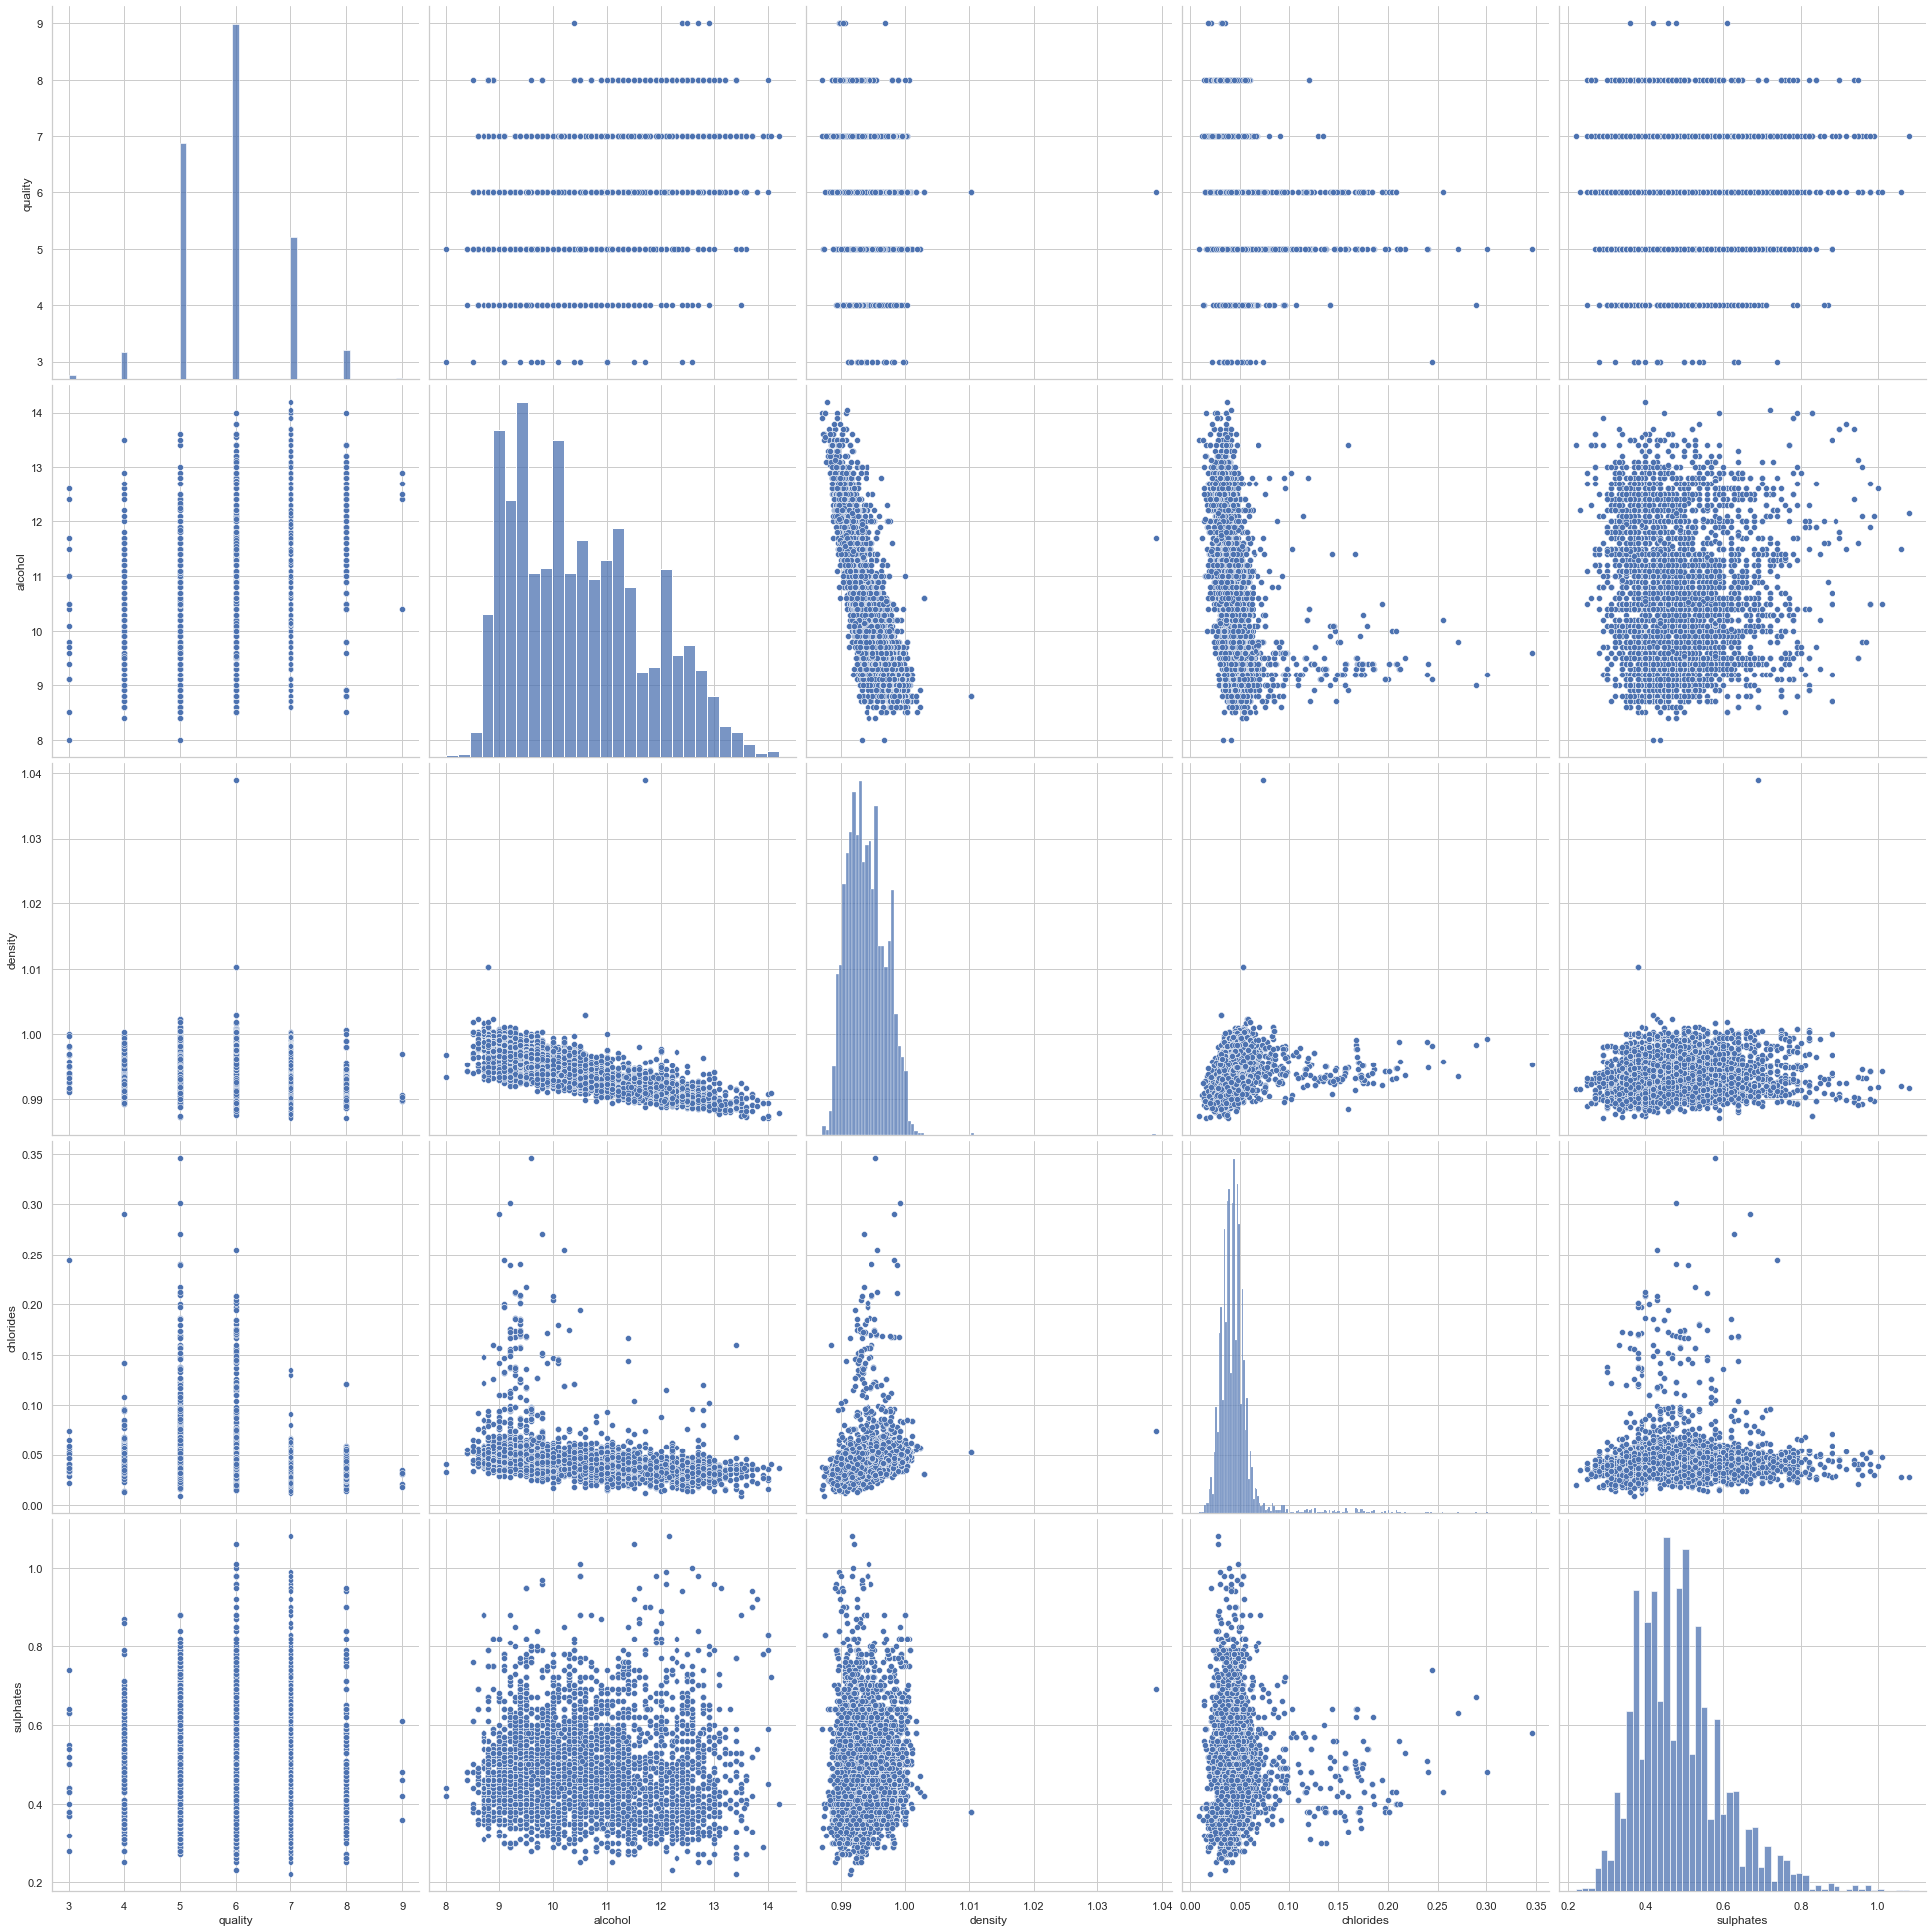

In [12]:
cols=['quality','alcohol', 'density','chlorides', 'sulphates']
sns.pairplot(df[cols], height=5.5);

### 3.2. Pearson correlation matrix with heatmap

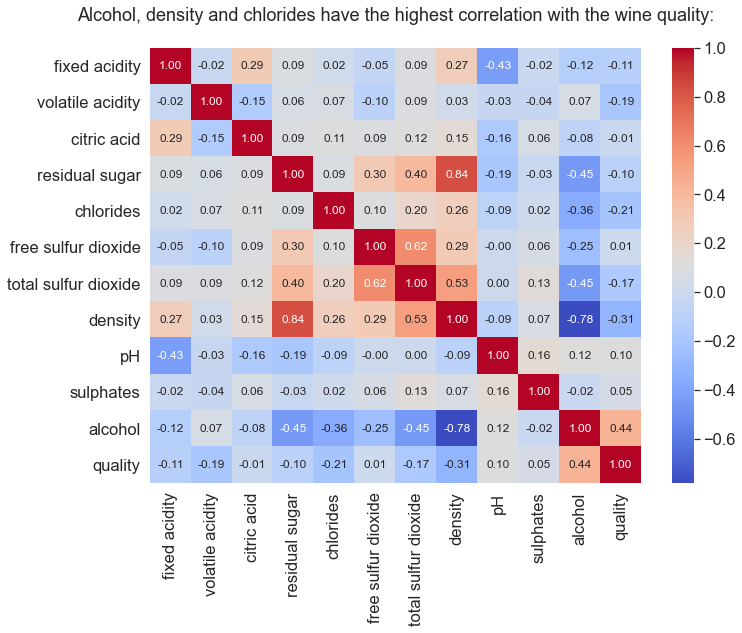

In [13]:
# create a heatmap with a matrix of correlations
plt.figure(figsize=(11,8))
cor = df.corr()
sns.set(font_scale=1.5)
sns.heatmap(cor, annot=True, cmap=plt.cm.coolwarm, annot_kws={'size':12}, fmt='.2f')
plt.title('Alcohol, density and chlorides have the highest correlation with the wine quality:\n')
plt.show()

In [14]:
# None of the features is highly correlated with teh output variable [cor_target>0.5]
# Selecting features highly correlated with the output variable
cor_target = abs(cor['quality'])
relevant_features = cor_target[cor_target>0.2]
relevant_features.sort_values(ascending = False) 

quality      1.000000
alcohol      0.435575
density      0.307123
chlorides    0.209934
Name: quality, dtype: float64

### 3.3. Feature importance

[0.08075402 0.10030079 0.08477541 0.08459028 0.08317604 0.09051375
 0.0883952  0.09416883 0.08534008 0.08273444 0.12525115]


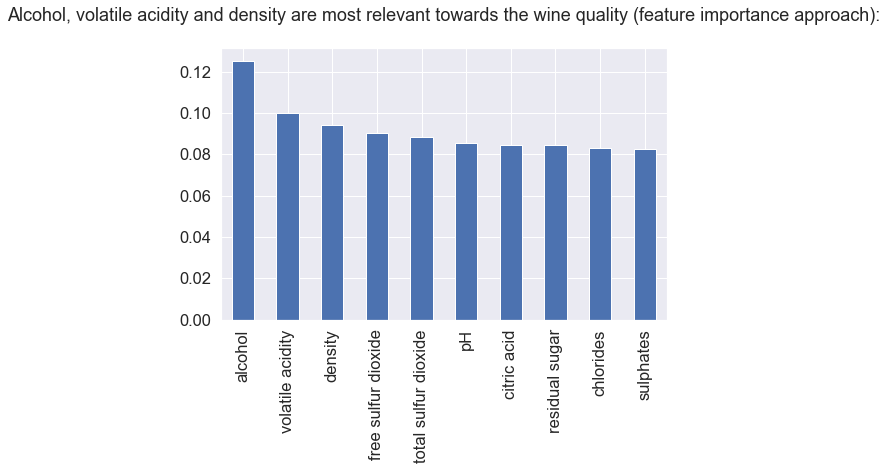

In [15]:
# plot feature importances to extract top features
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='bar', figsize=(8, 5))

plt.title('Alcohol, volatile acidity and density are most relevant towards the wine quality (feature importance approach):\n')
plt.show()

In [16]:
feat_importances.sort_values(ascending=False)

alcohol                 0.125251
volatile acidity        0.100301
density                 0.094169
free sulfur dioxide     0.090514
total sulfur dioxide    0.088395
pH                      0.085340
citric acid             0.084775
residual sugar          0.084590
chlorides               0.083176
sulphates               0.082734
fixed acidity           0.080754
dtype: float64

### 3.4. Univariate selection

In [17]:
# statistical test to select features with the strongest relationship with the output variable
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print('Total sulfur dioxide, free sulfur dioxide and residual sugar have the highest chi2 score:\n')
print(featureScores.nlargest(10,'Score'))  

Total sulfur dioxide, free sulfur dioxide and residual sugar have the highest chi2 score:

                   Specs        Score
6   total sulfur dioxide  2403.190512
5    free sulfur dioxide   619.999364
3         residual sugar   427.547265
10               alcohol   109.143869
1       volatile acidity     9.675709
0          fixed acidity     7.170118
4              chlorides     1.571145
2            citric acid     0.532746
9              sulphates     0.493422
8                     pH     0.369165


### 3.5. Random Forest

 1) alcohol                        0.113962
 2) density                        0.102716
 3) volatile acidity               0.102076
 4) total sulfur dioxide           0.093352
 5) free sulfur dioxide            0.092987
 6) residual sugar                 0.087057
 7) pH                             0.085862
 8) chlorides                      0.085177
 9) citric acid                    0.080598
10) sulphates                      0.079584
11) fixed acidity                  0.076629


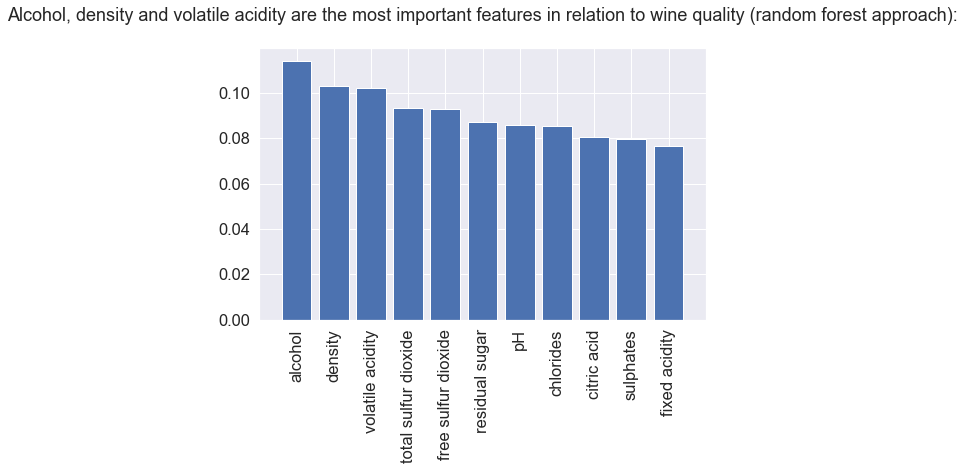

In [18]:
# Random Forest for determining feature importance
feat_labels = df.columns[:-1]
forest = RandomForestClassifier(n_estimators=10000,
                               random_state=42,
                               n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]


for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.figure(figsize=(8,5))
plt.title('Feature importance', size=18)
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])

plt.title('Alcohol, density and volatile acidity are the most important features in relation to wine quality (random forest approach):\n')
plt.show()

## 4. Feature extraction techniques for dimensionality reduction

### 4.1. Principal Component Analysis (PCA) 

In [19]:
# Principal Component Analysis (PCA) 
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.29297704, 0.14369848, 0.10959942, 0.0926799 , 0.08879757,
       0.08497552, 0.06660792, 0.05369946, 0.03823557, 0.02668483,
       0.00204429])

In [20]:
pca.components_[0]

array([ 0.15380294,  0.01121766,  0.14487984,  0.43018678,  0.20894662,
        0.30425805,  0.40747677,  0.51072912, -0.12904042,  0.03958429,
       -0.43455314])

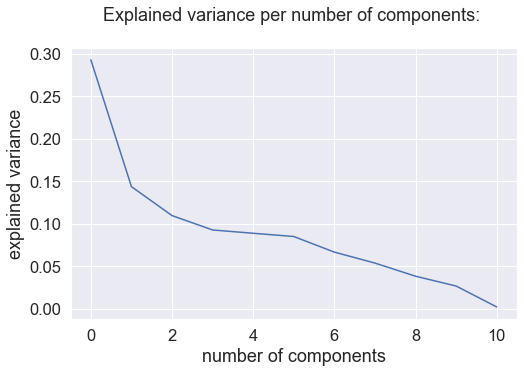

In [21]:
plt.figure(figsize=(8,5))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.title('Explained variance per number of components: \n', size=18);

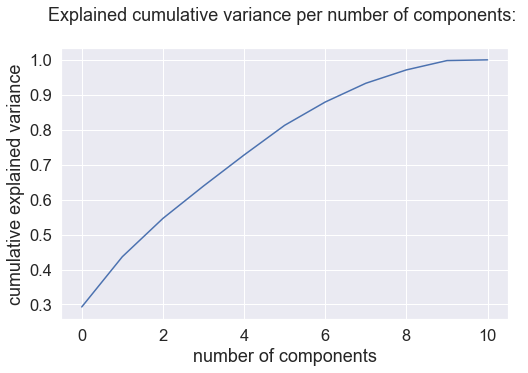

In [22]:
#pca = PCA().fit(df)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Explained cumulative variance per number of components: \n', size=18);

### 4.2. Linear Discriminant Analysis (LDA)

In [23]:
# Linear Discriminant Analysis (LDA)
lda = LDA(n_components=None)
X_train_lda = lda.fit_transform(X_train_std, y_train)